In [29]:
# General Definitions and imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Primary Color Palette
primary_color = "#2B2D42"
secondary_color = "#8D99AE"
accent_color = "#EF233C"
background_color = "#EDF2F4"
text_color = "#333333"

# Additional Colors
highlight_color = "#D90429"
info_color = "#3A86FF"
success_color = "#06D6A0"
warning_color = "#FFD166"
error_color = "#FF4B4B"

# Custom Chart Colors
chart_color_1 = "#264653" 
chart_color_2 = "#2A9D8F"
chart_color_3 = "#E9C46A"
chart_color_4 = "#F4A261"
chart_color_5 = "#E76F51" 

# Set the color palette
sns.set_palette(sns.color_palette([primary_color, accent_color]))

# Set the style
sns.set_style("whitegrid")

# Set the context
sns.set_context("notebook")

### Hypothesis:
"The number of new luxury car registrations in Austria is positively correlated with the real GDP per capita (BIP je Einwohner, real, auf VJ-Preisbasis)."

---

### Motivation:
Economic theory suggests that economic growth, especially increases in real GDP per capita, is often linked to higher consumer spending, particularly on luxury goods like cars. This hypothesis explores whether this pattern holds true in Austria by examining the relationship between new luxury car registrations and real GDP per capita.

---

### Testable Endpoints:
- **Luxury car registration data**: The number of new luxury car registrations in Austria each year.
- **Real GDP per capita data**: The real GDP per capita (BIP je Einwohner, real, auf VJ-Preisbasis) for Austria, measured annually. Source: [Österreichische Nationalbank](https://www.oenb.at/isawebstat/stabfrage/createReport?lang=DE&original=false&report=7.1)
- **Correlation analysis**: Statistical correlation (e.g., Pearson correlation coefficient) between luxury car registrations and real GDP per capita.

---

### Hypothesis Testing (H0 and H1):
Using the Pearson correlation coefficient, we aim to:
- **H0**: There is no significant correlation between GDP per capita and luxury car registrations.
- **H1**: There is a significant positive correlation between GDP per capita and luxury car registrations.

The goal is to either reject the null hypothesis (H0) or fail to reject it based on the strength of the correlation.

---

### Proof or Disproof:
- **Proof (Supporting H1)**: If the correlation coefficient is close to **+1**, we reject **H0** and accept **H1**, showing a strong positive correlation.
- **Disproof (Failing to reject H0)**: If the correlation is weak or close to **0**, we fail to reject **H0**, showing no significant relationship.

---

### Real-Life Use Case:
Understanding the link between economic growth and luxury car registrations can help manufacturers, dealerships, and policymakers predict consumer behavior during times of economic growth or decline, leading to better strategy planning.

Even though car purchases are included in GDP, analyzing luxury car registrations gives additional insights. Luxury cars are usually bought by wealthier individuals, whose spending can be different from the general population. Tracking these purchases can show trends in high-end spending, which is often more sensitive to economic changes, and could provide early signs of economic shifts.


,Car-Model,Date,Registrations
0,Abarth <070022>,May 2008,5
1,Abarth <070022>,June 2008,4
2,Abarth <070022>,July 2008,20
3,Abarth <070022>,August 2008,15
4,Abarth <070022>,September 2008,11
...,...,...,...
21375,Others <..9999>,December 2012,1
21376,Others <..9999>,March 2014,1
21377,Others <..9999>,July 2016,1
21378,Others <..9999>,June 2019,1


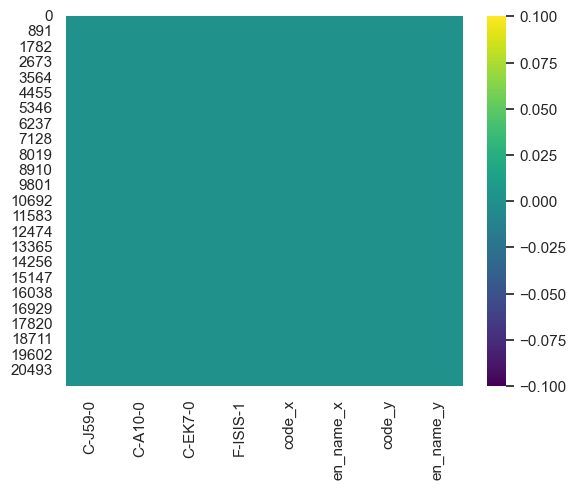

In [30]:
# Loading the Dataset with the registration numbers the dates and car models 
df_nmb_of_registrations = pd.read_csv('Data/OGD_fkfzul0759_OD_PkwNZL_1.csv', sep=';')
df_monthly_values = pd.read_csv('Data/OGD_fkfzul0759_OD_PkwNZL_1_C-A10-0.csv', sep=';')
df_car_name = pd.read_csv('Data/OGD_fkfzul0759_OD_PkwNZL_1_C-J59-0.csv', sep=';')

# Only taking the important columns 
df_monthly_values = df_monthly_values[['code', 'en_name']]
df_car_name = df_car_name[['code', 'en_name']]

# Merging all three Datasets to one 
merged_data = pd.merge(df_nmb_of_registrations, df_monthly_values, left_on='C-A10-0', right_on='code', how='left')
merged_data = pd.merge(merged_data, df_car_name, left_on='C-J59-0', right_on='code', how='left')

# Visualizing missing data 
sns.heatmap(merged_data.isnull(), cmap='viridis')

# Dropping columns which are not needed anymore to get a clear Dataframe and rename them too
merged_data.drop(['C-EK7-0', 'code_x', 'code_y', 'C-A10-0',  'C-J59-0'], axis=1, inplace=True)
merged_data.rename(columns={'F-ISIS-1': 'Registrations', 'en_name_x': 'Date', 'en_name_y': 'Car-Model'}, inplace=True)

# Changing the order to make also a clear Dataframe
merged_data = merged_data[['Car-Model', 'Date', 'Registrations']]
merged_data

In [31]:
# Getting all missing values
rows_with_nan = merged_data[merged_data.isna().any(axis=1)]

print("Following rows have missing values which have to be removed (No Date, No Registration numbers): ")

# Simple check to print the missing values
if rows_with_nan.empty:
    print("No missing values where found")
else:
    merged_data = merged_data.dropna()
    print(rows_with_nan)

# Removing <NUMBERS> from Car-Model 
merged_data['Car-Model'] = merged_data['Car-Model'].str.replace(r'<.*?>|\d+', '', regex=True)
merged_data['Car-Model'] = merged_data['Car-Model'].str.strip()

# Removing special characters 
special_char_pattern = r'[^a-zA-Z0-9äöüÄÖÜß\s-]'
columns_to_check = ['Registrations', 'Date']

for column in columns_to_check:
    merged_data[column] = merged_data[column].astype(str)
    special_char_rows = merged_data[merged_data[column].str.contains(special_char_pattern, regex=True, na=False)]
    count_special_chars = special_char_rows.shape[0]
    merged_data[column] = merged_data[column].str.replace(special_char_pattern, '', regex=True)
    print(f"Special characters where found at {column}: {count_special_chars} Rows")

# Changing after the check the column 'Registration' back to an Int
merged_data['Registrations'] = merged_data['Registrations'].astype(int)
# Export the DataFrame as .csv file into the export/ folder 
# merged_data.to_csv('export/Car_registrations_by_name_and_date.csv', index=False)
merged_data

Following rows have missing values which have to be removed (No Date, No Registration numbers): 
No missing values where found
Special characters where found at Registrations: 0 Rows
Special characters where found at Date: 72 Rows


,Car-Model,Date,Registrations
0,Abarth,May 2008,5
1,Abarth,June 2008,4
2,Abarth,July 2008,20
3,Abarth,August 2008,15
4,Abarth,September 2008,11
...,...,...,...
21375,Others,December 2012,1
21376,Others,March 2014,1
21377,Others,July 2016,1
21378,Others,June 2019,1


In [32]:
# Define a list of luxury car manufacturers
luxury_car_manufacturers = np.array([
    "Aston Martin",
    "Bentley",
    "Bugatti",
    "Ferrari",
    "Jaguar",
    "Koenigsegg",
    "Lamborghini",
    "Lucid",
    "McLaren",
    "Maserati",
    "Maybach",
    "Porsche",
    "Rolls Royce",
    "Wiesmann",
])

# Create a regex pattern by joining the luxury car manufacturers with '|'
# This pattern will be used to match any car model that contains these brand names
pattern = "|".join(luxury_car_manufacturers)

# Filter the merged_data to keep only rows where "Car-Model" contains any of the luxury car brand names
luxus_cars = merged_data[merged_data["Car-Model"].str.contains(pattern, regex=True)].copy()

# Reset the index of the resulting DataFrame for clean row numbering
luxus_cars.reset_index(inplace=True)

# Extract the year from the "Date" column (assuming the date is in a string format) and convert it to an integer
luxus_cars["Year"] = luxus_cars["Date"].str.extract("(\d+)").astype(int)

# Filter the data to include only cars registered between the years 2000 and 2022
luxus_cars = luxus_cars[(luxus_cars["Year"] > 1999) & (luxus_cars["Year"] < 2023)]

# Display the first few rows of the resulting DataFrame
luxus_cars.head()

,index,Car-Model,Date,Registrations,Year
0,310,Aston Martin (GB),July 2004,2,2004
1,311,Aston Martin (GB),October 2004,2,2004
2,312,Aston Martin (GB),November 2004,3,2004
3,313,Aston Martin (GB),December 2004,1,2004
4,314,Aston Martin (GB),January 2005,2,2005


In [33]:
# Group the luxury car registrations by year and sum the registrations for each year
registrations_by_year = luxus_cars.groupby("Year")["Registrations"].sum().to_frame()

# Reset the index so that "Year" becomes a regular column again
registrations_by_year.reset_index(inplace=True)

# Remove the last row, possibly to exclude incomplete or irrelevant data for the final year
registrations_by_year = registrations_by_year.iloc[:-1]

# Display the first few rows of the resulting DataFrame
registrations_by_year.head()

,Year,Registrations
0,2000,979
1,2001,966
2,2002,1031
3,2003,1168
4,2004,1619


In [35]:
# Load the CSV file containing GDP data, using 'latin1' encoding and ';' as the separator
bip_yearly = pd.read_csv("./Data/OeNB_7_1_AusgewähltevolkswirtschaftlicheKennziffern_20241008_192245.csv", encoding="latin1", sep=";")

# Filter the data to include only rows where the "Indikator" contains the specific GDP indicator
bip_yearly = bip_yearly[bip_yearly["Indikator"].str.contains("BIP je Erwerbstätigen, real, auf VJ-Preisbasis - RJ2015")].copy()

# Drop unnecessary columns from the DataFrame to clean up the dataset
bip_yearly.drop(columns=["Monat", "Tag", "Einheit", "Status", "Produzent", "Region / Geschäftspartner", "Datentyp", 
                         "Sortierkriterium des Indikators", "Periode", "Halbjahr", "Quartal", "Indikator"], inplace=True)

# Keep only rows where the "Jahr" (year) is less than 2022, excluding future or incomplete years
bip_yearly = bip_yearly[bip_yearly["Jahr"] < 2022]

# Convert the "Werte" column (values) from string to float, replacing commas with periods for correct formatting
bip_yearly["Werte"] = bip_yearly["Werte"].str.replace(",", ".").astype(float)

# Display the first few rows of the cleaned DataFrame
bip_yearly.head()

,Jahr,Werte
3,2000,70542.0
29,2001,70953.0
55,2002,71975.0
81,2003,72431.0
107,2004,73988.0


In [36]:
# Sort the 'registrations_by_year' DataFrame by the 'Year' column in ascending order
registrations_by_year = registrations_by_year.sort_values(by="Year")

# Sort the 'bip_yearly' DataFrame by the 'Jahr' (year) column in ascending order
bip_yearly = bip_yearly.sort_values(by="Jahr")

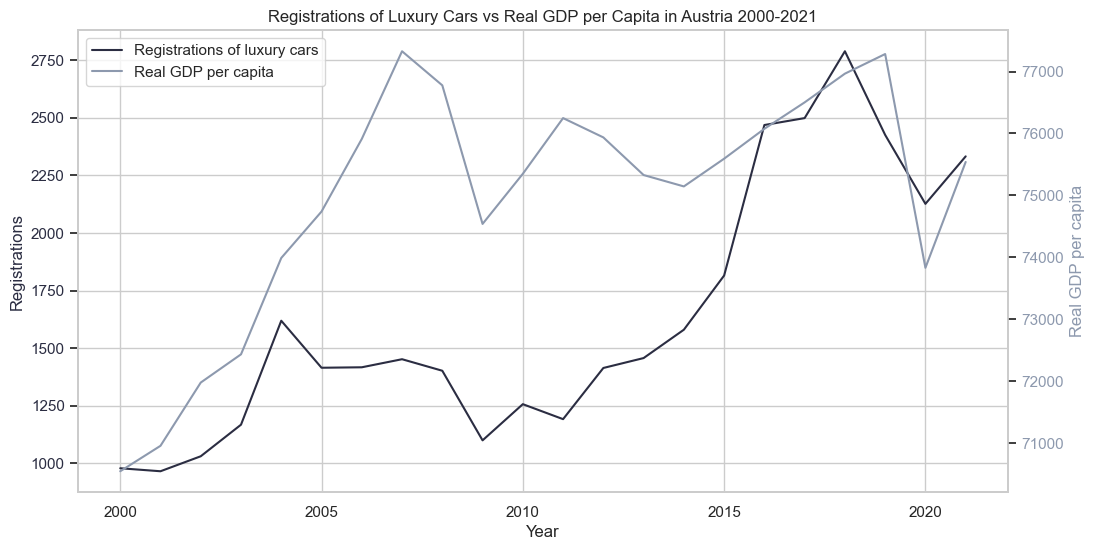

In [38]:
# Plot erstellen
fig, ax1 = plt.subplots(figsize=(12, 6))  # Set the figure size, width = 12, height = 6

# Plot registrations on the left y-axis (using Seaborn style)
ax1.set_xlabel("Year")
ax1.set_ylabel("Registrations", color=primary_color)
sns.lineplot(x="Year", y="Registrations", data=registrations_by_year, ax=ax1, color=primary_color, label="Registrations of luxury cars", legend=False)
ax1.tick_params(axis="y", labelcolor=primary_color)

# Create a second y-axis for the real GDP per capita (BIP pro Kopf) and plot it
ax2 = ax1.twinx()
ax2.set_ylabel("Real GDP per capita", color=secondary_color)
sns.lineplot(x="Jahr", y="Werte", data=bip_yearly, ax=ax2, color=secondary_color, label="Real GDP per capita", legend=False)
ax2.tick_params(axis="y", labelcolor=secondary_color)

# Disable the grid for the second y-axis to avoid a double grid
ax2.grid(False)

# Add a title to the plot
plt.title("Registrations of Luxury Cars vs Real GDP per Capita in Austria 2000-2021")

# Create a combined legend from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Show the plot
plt.show()

### Registrations of Luxury Cars vs Real GDP per Capita in Austria (2000-2021)

The line chart above shows the relationship between the number of luxury car registrations and real GDP per capita in Austria from 2000 to 2021.

- **Left Y-axis (black line)**: Represents the number of luxury car registrations per year. This shows fluctuations over time, with notable peaks around 2004 and 2017, with a significant drop during the financial crisis around 2008-2010.
  
- **Right Y-axis (light blue line)**: Represents the real GDP per capita in Austria. The GDP shows a generally steady increase from 2000, with a decline during the 2008 financial crisis and a recent dip around 2020, likely related to the COVID-19 pandemic.

### Interpretation:
The chart suggests a moderate positive correlation between luxury car registrations and real GDP per capita. While the two lines do not always move together, significant dips in GDP (e.g., during the financial crisis and COVID-19) coincide with declines in luxury car registrations. Periods of economic growth appear to support higher luxury car sales.


Pearson correlation coefficient: 0.58


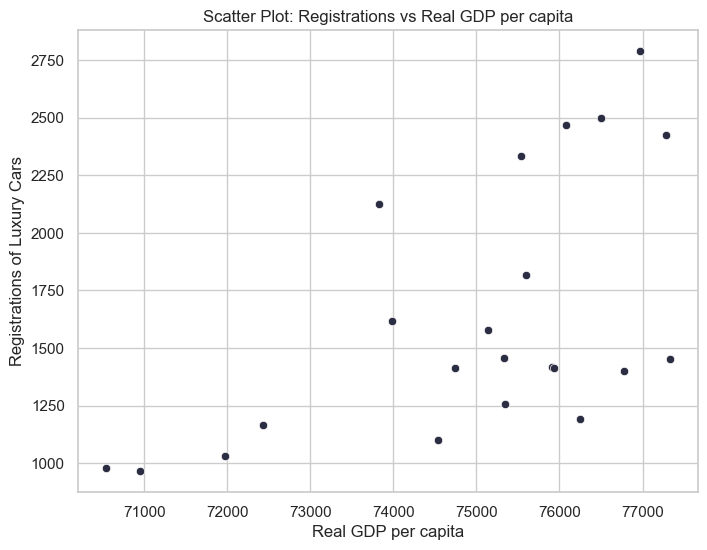

In [40]:
# Merge the two DataFrames based on the "Year" and "Jahr" columns
# This combines the luxury car registrations with the GDP data for corresponding years
merged_data = pd.merge(registrations_by_year, bip_yearly, left_on="Year", right_on="Jahr")

# Create a scatter plot to visualize the relationship between GDP and luxury car registrations
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x=merged_data["Werte"], y=merged_data["Registrations"])  # Plot the data points

# Add titles and labels to the scatter plot
plt.title("Scatter Plot: Registrations vs Real GDP per capita")
plt.xlabel("Real GDP per capita")
plt.ylabel("Registrations of Luxury Cars")

# Show the plot
plt.show()

### Scatter Plot: Registrations vs Real GDP per capita

The scatter plot above visualizes the relationship between the number of luxury car registrations and real GDP per capita in Austria. Each point represents a year between 2000 and 2021. The plot suggests a moderate positive correlation, where higher GDP per capita tends to be associated with more luxury car registrations.

In [41]:
# Calculate the Pearson correlation coefficient between luxury car registrations and real GDP per capita
correlation, _ = pearsonr(merged_data["Registrations"], merged_data["Werte"])
print(f'Pearson correlation coefficient: {correlation:.2f}')

Pearson correlation coefficient: 0.58


### Hypothesis Evaluation:

Based on the analysis, with a **Pearson correlation coefficient of 0.58**, there is a **moderate positive correlation** between new car registrations and real GDP per capita in Austria.

### Conclusion:

- **H0** (no significant correlation) is **rejected**, and **H1** (positive correlation) is **supported**, indicating a moderate relationship between economic growth and car registrations.
  
### Summary:

While the correlation is not strong, it suggests that higher GDP per capita is generally associated with increased car registrations. This insight can help manufacturers and policymakers anticipate market trends during economic growth phases.
